In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('placement.csv')

In [79]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [80]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [81]:
df.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


Text(0, 0.5, 'Packages in LPA')

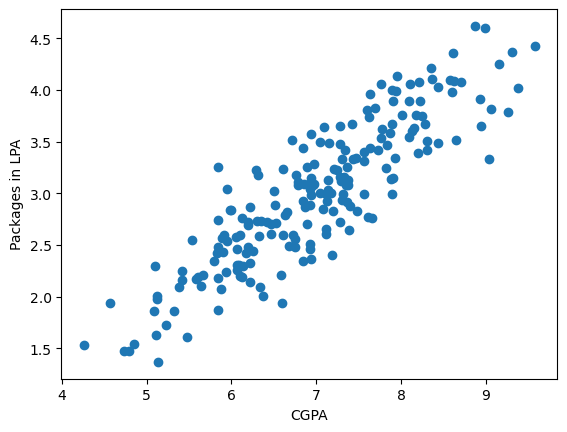

In [82]:
plt.scatter(x = df['cgpa'],y = df['package'])
plt.xlabel('CGPA')
plt.ylabel('Packages in LPA')

In [83]:
# Dependent and Independent Variable

In [84]:
X = df.iloc[:,:-1]

In [85]:
y = df.iloc[:,-1]

In [86]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [87]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression() 

In [91]:
lr.fit(X_train,y_train)

LinearRegression()

In [92]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [93]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [94]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.13635249])

In [95]:
lr.predict([[7.36]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.1995207])

Text(0, 0.5, 'Packages in LPA')

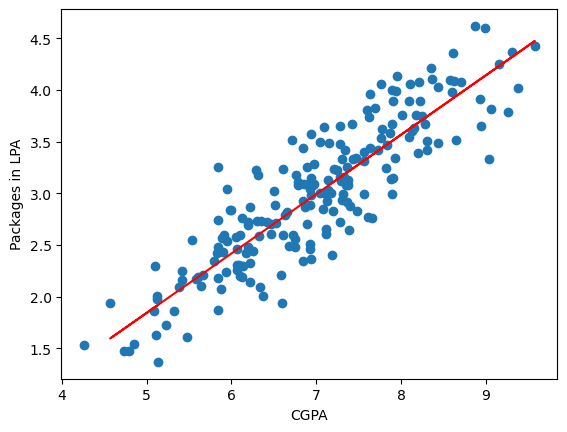

In [96]:
plt.scatter(x = df['cgpa'],y = df['package'])
plt.plot(X_train,lr.predict(X_train),color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Packages in LPA')

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [98]:
y_pred = lr.predict(X_test)

In [99]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [100]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.23150985393278373


In [101]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.08417638361329657


In [102]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.2901316659954521


In [103]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.7730984312051673


In [104]:
X_test.shape

(40, 1)

In [105]:
# Adjusted R2

In [106]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7671273372895138

In [107]:
new_df1 = df.copy()

new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]

new_df1.head()

,cgpa,random_feature,package
0,6.89,0.480728,3.26
1,5.12,0.620600,1.98
2,7.82,0.680548,3.25
3,7.42,0.941145,3.67
4,6.94,0.749892,3.57


In [108]:
new_df1.sample(10)

,cgpa,random_feature,package
83,8.44,0.423447,3.49
75,6.97,0.497665,3.28
165,8.21,0.988031,4.08
97,5.98,0.535815,2.84
46,6.07,0.752699,2.26
44,5.09,0.875556,1.86
148,7.57,0.070794,3.40
156,7.38,0.170313,3.13
85,4.79,0.065352,1.48
50,9.58,0.053881,4.43


Text(0, 0.5, 'Packages in LPA')

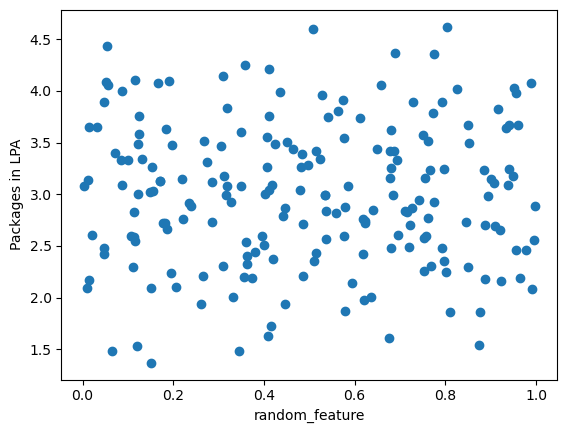

In [109]:
plt.scatter(x = new_df1['random_feature'],y = new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Packages in LPA')

In [110]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lr = LinearRegression()

In [114]:
lr.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = lr.predict(X_test)

In [116]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [117]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.7700045723074356


In [118]:
# Adjusted R2

In [120]:
X_test.shape

(40, 2)

In [121]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7575723870267564

In [122]:
# Relevant Feture

In [124]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package']+(np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

new_df2.head()

,cgpa,iq,package
0,6.89,2.26,3.26
1,5.12,2.58,1.98
2,7.82,3.75,3.25
3,7.42,3.77,3.67
4,6.94,3.07,3.57


Text(0, 0.5, 'Packages in LPA')

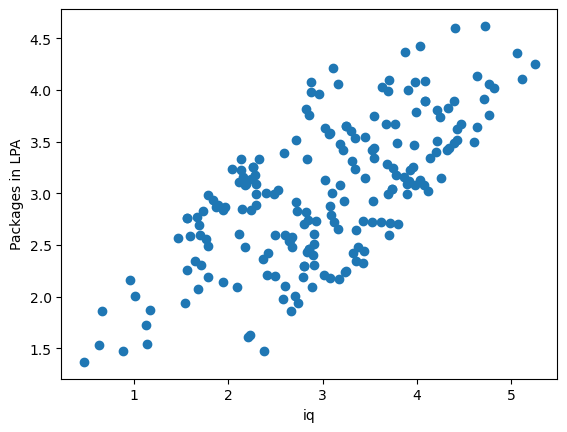

In [125]:
plt.scatter(x = new_df2['iq'],y = new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Packages in LPA')

In [126]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
lr = LinearRegression()

In [130]:
lr.fit(X_train,y_train)

LinearRegression()

In [131]:
y_pred = lr.predict(X_test)

In [132]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [133]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.8231037137621049


In [134]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8135417523438403